In [1]:
#ejemplo Regresión Logística PDF
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


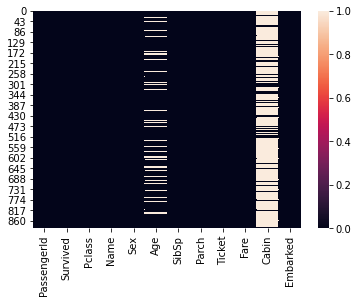

In [8]:
sns.heatmap(data.isnull())

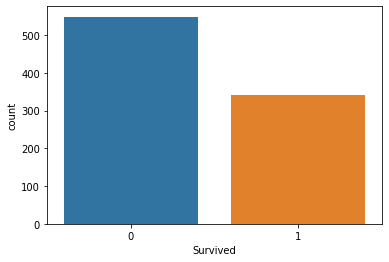

In [10]:
sns.countplot(x='Survived', data=data)

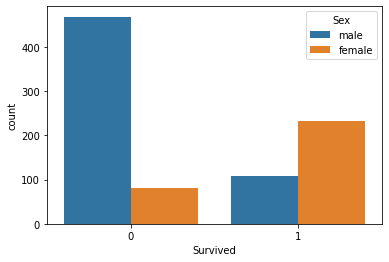

In [11]:
sns.countplot(x='Survived', data=data, hue='Sex')

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

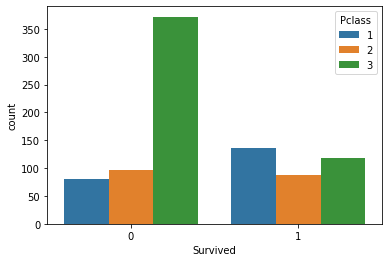

In [13]:
sns.countplot(x='Survived', data=data, hue='Pclass')

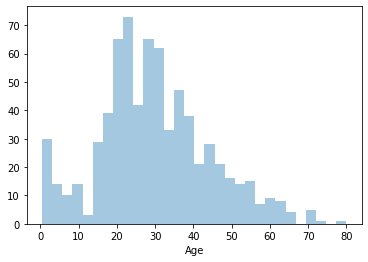

In [16]:
sns.distplot(data['Age'].dropna(), kde=False, bins=30)

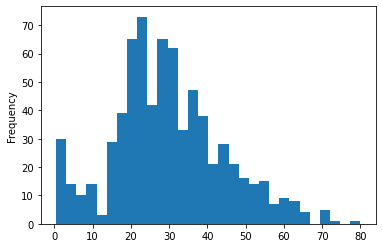

In [17]:
data['Age'].plot.hist(bins=30)

In [23]:
import cufflinks as cf

In [25]:
def edad_media(columnas):
    edad=columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase==1:
            return 38
        elif clase==2:
            return 30
        else:
            return 25
    else:
        return edad

In [26]:
data['Age']=data[["Age","Pclass"]].apply(edad_media, axis=1)

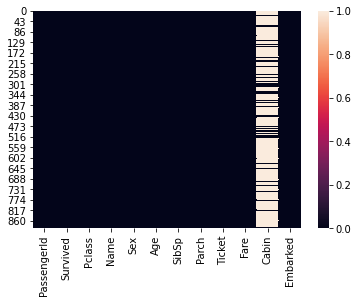

In [27]:
sns.heatmap(data.isnull())

In [29]:
data.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace=True)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
sexo = pd.get_dummies(data['Sex'], drop_first=True)

In [35]:
data=pd.concat([data,sexo],axis=1)

In [39]:
puerto=pd.get_dummies(data['Embarked'], drop_first=True)

In [41]:
data=pd.concat([data, puerto], axis=1)

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [43]:
y = data['Survived']
x = data.drop('Survived',axis=1)